In [1]:
import sys
if 'google.colab' in sys.modules:
    !git clone  https://github.com/ecastillot/delaware.git ./delaware
    !pip install obspy
    

In [3]:
import sys
import os

version = "10102024"

if 'google.colab' in sys.modules:
    dw_path = os.path.join("/content/delaware",version)
else:
    dw_path = os.path.join("/home/emmanuel/ecastillo/dev/delaware",version)
    
sys.path.append(dw_path)

# Stations

In [4]:
import pandas as pd
import os

stations_relpath = "data_git/stations/standard_stations.csv"
stations_path = os.path.join(dw_path,stations_relpath)
stations = pd.read_csv(stations_path)
stations_columns = ["network","station","latitude","longitude","elevation","x[km]","y[km]"]
stations = stations[stations_columns]
stations

,network,station,latitude,longitude,elevation,x[km],y[km]
0,4O,WB01,31.721667,-104.060278,0.92700,-11583.937159,3726.830293
1,4O,CT01,31.902850,-104.144532,0.99400,-11593.316271,3750.564925
2,4O,SA02,31.671630,-104.264900,0.76000,-11606.715576,3720.283725
3,4O,SA04,31.755930,-104.254580,0.76000,-11605.566758,3731.315115
4,4O,SA06,31.756960,-104.149710,0.76000,-11593.892683,3731.449961
5,4O,WB02,31.736302,-103.944920,0.93200,-11571.095621,3728.745711
6,4O,WB03,31.610722,-103.968839,0.99400,-11573.758171,3712.319547
7,4O,SA07,31.865780,-104.364810,1.10300,-11617.837506,3745.705033
8,4O,WB04,31.530513,-103.950319,0.96189,-11571.696579,3701.839715
9,4O,WB05,31.753781,-103.832948,0.85481,-11558.630888,3731.033735


# Custom Client: Catalog with picks

In [5]:
from obspy import UTCDateTime
from delaware.core.client import CustomClient
from delaware.loc.inv import prepare_cat2inv

provider = "USGS"
station_names = ["WB03"]
radius = [1]
starttime=UTCDateTime("2023-01-01 15:26:30")
endtime=UTCDateTime("2024-01-30 15:26:32")


db = {"catalog":[],
      "picks":[]}
for i,sta_name in enumerate(station_names):
    station_row = stations[stations["station"].isin([sta_name])]
    station_row = station_row.drop_duplicates(subset=["station"],ignore_index=True)
    print(station_row.loc[0].station)
    
    client =  CustomClient(provider)
    sta_cat,sta_picks,_ = client.get_custom_events(
                            latitude=station_row.loc[0].latitude,
                            longitude=station_row.loc[0].longitude,
                            maxradius=radius[i]/111,
                            includeallorigins=True,
                            starttime=starttime,
                            endtime=endtime)
    sta_cat,sta_picks = prepare_cat2inv(sta_cat,sta_picks,attach_station=stations)
    if not sta_cat.empty:
        db["catalog"].append(sta_cat)
    if not sta_picks.empty:
        db["picks"].append(sta_picks)

for key,data in db.items():
    if data:
        db[key] = pd.concat(data)
    else:
        raise Exception(f"No data for {key}")

print(db)

WB03


/home/emmanuel/ecastillo/dev/delaware/10102024/delaware/core/client.py:712: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_picks = pd.concat(all_picks, axis=0)


{'catalog':               ev_id                origin_time  eq_latitude  eq_longitude  \
0    texnet2023acht 2023-01-02 06:11:37.408351    31.615244   -103.968559   
1    texnet2023adtw 2023-01-03 01:26:09.031757    31.612004   -103.975539   
2    texnet2023agjl 2023-01-04 11:36:42.744357    31.610174   -103.972841   
3    texnet2023agjq 2023-01-04 11:40:58.776109    31.606508   -103.969597   
4    texnet2023akej 2023-01-06 13:32:22.613913    31.613000   -103.977000   
..              ...                        ...          ...           ...   
205  texnet2024absh 2024-01-01 22:22:45.982513    31.615000   -103.971000   
206  texnet2024agra 2024-01-04 15:25:30.684960    31.614000   -103.961000   
207  texnet2024anyy 2024-01-08 15:22:08.156378    31.609000   -103.963000   
208  texnet2024augx 2024-01-12 02:12:02.773522    31.605000   -103.966000   
209  texnet2024bwbc 2024-01-27 07:04:20.072420    31.612000   -103.966000   

     magnitude  
0          2.4  
1          1.9  
2          2

# Waveforms

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def group_data_by_station(st, window_lp, window_rp,ev_id=None):
    """
    Group seismic data by station and generate time windows.

    Parameters:
    - st: ObsPy Stream object containing seismic traces.
    - window_lp: float, left point of the window in seconds.
    - window_rp: float, right point of the window in seconds.

    Returns:
    - data_grouped: dict, where keys are station identifiers, and values are data arrays.
    """
    data_grouped = {}
    st_grouped = st.copy()
    st_grouped = st_grouped._groupby('{network}.{station}.{channel}')
    
    if ev_id is None:
        ev_id = ""
    
    for station_id, single_st in st_grouped.items():
        str_id = ".".join((station_id,ev_id))
        endpoint = window_lp + window_rp
        sampling_rate = int(single_st[0].stats.sampling_rate)
        
        t = np.linspace(0, endpoint, int(sampling_rate * endpoint) + 1)
        y = np.zeros_like(t)  # Create an array of zeros with the same length as `t`
        
        y[:len(single_st[0].data)] = single_st[0].data
        xy_data = np.column_stack((t, y))
        data_grouped[str_id] = xy_data
    
    return data_grouped


# group_data_by_station(st,window_lp,window_rp)

In [82]:
st

0 Trace(s) in Stream:


In [83]:
import datetime as datetime
from obspy.clients.fdsn import Client

station_picks = None
window_lp = 5
window_rp = 20

padding = 2 #padding
pre_filt=[0.05,1,40,40.05]

wav_provider = "TEXNET"
wav_client = Client(wav_provider)

wav_data = {}
for _,event in db["catalog"].iterrows():
    
    ev_id = event.ev_id
    # print(event.ev_id)
    picks = db["picks"].copy()
    picks = picks[picks["ev_id"]==ev_id]
    
    if station_picks is not None:
        picks = picks[picks["station"].isin(station_picks)]
    
    grouped_picks = picks.groupby("station")
    
    
    for sta_name, data in grouped_picks.__iter__():
        strid = ".".join((sta_name,ev_id))
        
        row = data.iloc[0]
        
        lp_shift = datetime.timedelta(seconds=row.tt_P) - datetime.timedelta(seconds=window_lp) 
        rp_shift = datetime.timedelta(seconds=row.tt_P) + datetime.timedelta(seconds=window_rp) 
        
        wav_starttime = event.origin_time + lp_shift
        wav_endtime = event.origin_time + rp_shift
        
        pretrim_wav_starttime = wav_starttime - datetime.timedelta(seconds=padding)
        pretrim_wav_endtime = wav_endtime + datetime.timedelta(seconds=padding)
        
        # wav_data[strid] = 
        try:
            st = wav_client.get_waveforms(network="*",station=sta_name,
                                          location="*",channel="*",
                                    starttime=UTCDateTime(pretrim_wav_starttime),
                                    endtime=UTCDateTime(pretrim_wav_endtime))
        except Exception as e:
            print(f"Wav not found {strid}: {e}")
        
        if len(st)== 0:
            continue
        
        stats = st[0].stats
        
        try:
            inv = wav_client.get_stations(network=stats.network,
                                        station=stats.station,
                                        level="response",
                                        starttime=UTCDateTime(pretrim_wav_starttime),
                                        endtime=UTCDateTime(pretrim_wav_endtime))

            st.remove_response(inventory=inv,
                               zero_mean=True,
                               pre_filt=pre_filt) # filtering more than 1 hz
        except:
            print(f"Response not found {strid}")
            
        st = st.trim(starttime=UTCDateTime(wav_starttime),
                    endtime=UTCDateTime(wav_endtime))
        st= st.normalize(global_max=False)
        
        # print(st)
        # break
        grouped_data = group_data_by_station(st,window_lp,window_rp,ev_id)   


        
        # print(grouped_data)
        # break
        for key, val in grouped_data.items():
            wav_data[key] = val
    #     print(strid ,wav_starttime,wav_endtime)
    #     print(st)
    # break
print(wav_data)

/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)
/home/emmanuel/anaconda3/envs/seismonitor/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)


In [ ]:
import fnmatch

def query_dictionary(data_dict, network="*", station="*", channel="*", event_id="*"):
    """
    Query a dictionary with keys in the format 'network.station.channel.event_id' 
    using wildcard patterns.

    Parameters:
    - data_dict: dict, the dictionary to search, with keys in the format 'network.station.channel.event_id'.
    - network: str, wildcard pattern for the network (default is "*", matching all).
    - station: str, wildcard pattern for the station (default is "*", matching all).
    - channel: str, wildcard pattern for the channel (default is "*", matching all).
    - event_id: str, wildcard pattern for the event ID (default is "*", matching all).

    Returns:
    - dict, filtered dictionary containing only the keys that match the patterns.
    """
    filtered_dict = {}

    for key, value in data_dict.items():
        key_parts = key.split(".")
        if len(key_parts) != 4:
            continue  # Skip keys that don't match the expected format
        
        key_network, key_station, key_channel, key_event_id = key_parts
        
        # Apply pattern matching using fnmatch
        if (fnmatch.fnmatch(key_network, network) and
            fnmatch.fnmatch(key_station, station) and
            fnmatch.fnmatch(key_channel, channel) and
            fnmatch.fnmatch(key_event_id, event_id)):
            filtered_dict[key] = value

    return filtered_dict


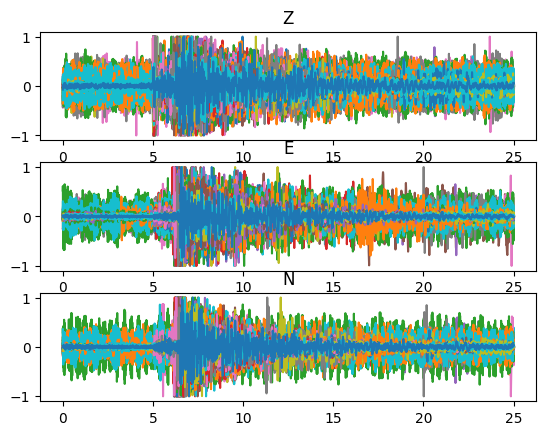

In [ ]:
sta = "WB03"

z_data = query_dictionary(wav_data,station=sta,channel="*Z")
e_data = query_dictionary(wav_data,station=sta,channel="*E")
n_data = query_dictionary(wav_data,station=sta,channel="*N")

comp_data = {"Z":z_data,"E":e_data,"N":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)
        

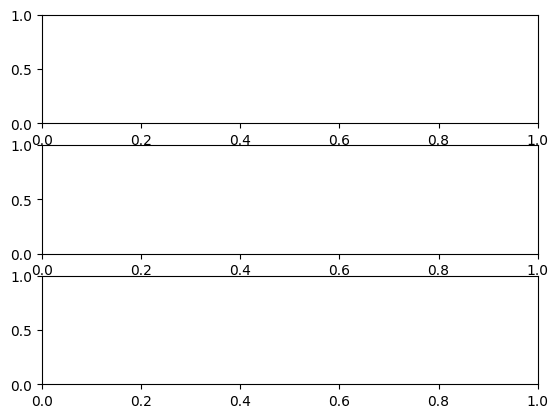

In [ ]:
sta = "PB36"

z_data = query_dictionary(wav_data,station=sta,channel="*Z")
e_data = query_dictionary(wav_data,station=sta,channel="*E")
n_data = query_dictionary(wav_data,station=sta,channel="*N")

comp_data = {"Z":z_data,"E":e_data,"N":n_data}
n_plots = len(comp_data)
fig,axes = plt.subplots(n_plots,1)

for n,comp in enumerate(comp_data):
    data = comp_data[comp]
    for key,tr in data.items():
        t = tr[:, 0]  # First column
        y = tr[:, 1]        # Second column
        axes[n].plot(t,y)
        axes[n].set_title(comp)

{'4O.WB03.HHE': array([[ 0.00000000e+00,  1.67534235e-03],
        [ 5.00000000e-03, -2.83102425e-03],
        [ 1.00000000e-02,  1.89444046e-03],
        ...,
        [ 3.49000000e+00,  3.93649026e-02],
        [ 3.49500000e+00, -1.19237936e-01],
        [ 3.50000000e+00,  6.73206224e-02]]),
 '4O.WB03.HHN': array([[ 0.00000000e+00,  3.74483484e-03],
        [ 5.00000000e-03, -5.66773141e-03],
        [ 1.00000000e-02,  3.19328788e-03],
        ...,
        [ 3.49000000e+00,  1.03960479e-01],
        [ 3.49500000e+00, -2.22586179e-01],
        [ 3.50000000e+00,  1.35385407e-01]]),
 '4O.WB03.HHZ': array([[ 0.        ,  0.01384502],
        [ 0.005     , -0.01459414],
        [ 0.01      ,  0.01271237],
        ...,
        [ 3.49      , -0.21588589],
        [ 3.495     ,  0.27635903],
        [ 3.5       , -0.18764557]])}

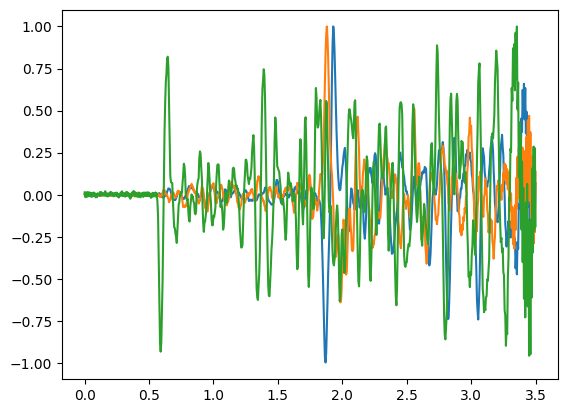

In [17]:


grouped_data = group_data_by_station(st,window_lp,window_rp)    

for tr in grouped_data.values():
    t = tr[:, 0]  # First column
    y = tr[:, 1]        # Second column
    plt.plot(t,y)
    # tr[0].shape
    # print(tr.shape)
    # print(tr[0].shape)
grouped_data
# # st_grouped
# print(strid,single_st)
# print(single_st)
# print(t.shape)
# print(data.shape)

# Particle Swarm Optimization

In [4]:
import numpy as np

def loss_function(particles, r, tp_obs, ts_obs):
    z_guess = particles[:, 0]
    vp_guess = particles[:, 1]
    vs_guess = particles[:, 2]

    if np.any(vp_guess == 0):
        raise Exception("vp_guess must not contain any zeros")
    if np.any(vs_guess == 0):
        raise Exception("vs_guess must not contain any zeros")

    tp_pred = np.sqrt(r**2 + z_guess**2) / vp_guess
    ts_pred = np.sqrt(r**2 + z_guess**2) / vs_guess

    # Compute the errors (residuals)
    tp_error = (tp_pred - tp_obs)**2
    ts_error = (ts_pred - ts_obs)**2
    loss = tp_error + ts_error

    return loss

def vd_pso(cost_func,
           picks,
           bounds,
           max_iter=100,w=0.5,c1=0.8,c2=0.9):
    
    n_particles = len(picks)
    dim = bounds.shape[-1]
    
    particles = np.random.uniform(low=bounds[0], high=bounds[1], size=(n_particles, dim))
    velocities = np.zeros((n_particles, dim))
    args = {col: picks[col].to_numpy() for col in ["r",'tt_P','tt_S']}
    
    # Initialize the particles and velocities
    particles = np.random.uniform(low=bounds[0], high=bounds[1], size=(n_particles, 3))
    velocities = np.zeros((n_particles, 3))

    # Initialize the best positions and best costs
    best_positions = particles.copy()
    best_costs = cost_func(
                            particles=particles,
                            r=args["r"],
                            tp_obs=args["tt_P"],
                            ts_obs=args["tt_S"]
                        )

    # Initialize the global best position and global best cost
    global_best_position = particles[0].copy()
    global_best_cost = best_costs[0]

    # Perform the optimization
    for i in range(max_iter):
        # Update the velocities
        r1 = np.random.rand(n_particles, 3) #Random matrix used to compute the cognitive component of the veocity update
        r2 = np.random.rand(n_particles, 3) #Random matrix used to compute the social component of the veocity update


        #Cognitive component is calculated by taking the difference between the
        #particle's current position and its best personal position found so far,
        #and then multiplying it by a random matrix r1 and a cognitive acceleration coefficient c1.
        cognitive_component = c1 * r1 * (best_positions - particles)

        #The social component represents the particle's tendency to move towards the
        #global best position found by the swarm. It is calculated by taking the
        #difference between the particle's current position and the global best position
        # found by the swarm, and then multiplying it by a random matrix r2 and a
        #social acceleration coefficient c2.
        social_component = c2 * r2 * (global_best_position - particles)

        #The new velocity of the particle is computed by adding the current velocity
        #to the sum of the cognitive and social components, multiplied by the inertia
        #weight w. The new velocity is then used to update the position of the
        #particle in the search space.
        velocities = w * velocities + cognitive_component + social_component

        # Update the particles
        particles += velocities

        # Enforce the bounds of the search space
        particles = np.clip(particles, bounds[0], bounds[1])

        # Evaluate the objective function
        costs = cost_func(
                            particles=particles,
                            r=args["r"],
                            tp_obs=args["tt_P"],
                            ts_obs=args["tt_S"]
                        )

        # Update the best positions and best costs
        is_best = costs < best_costs
        best_positions[is_best] = particles[is_best]
        best_costs[is_best] = costs[is_best]

        # Update the global best position and global best cost
        global_best_index = np.argmin(best_costs)
        global_best_position = best_positions[global_best_index].copy()
        global_best_cost = best_costs[global_best_index]

        # Print the progress
        if (i+1)%10 == 0:
            print(f'Iteration {i+1}: Best Cost = {global_best_cost} | sol:{global_best_position}')
    
    return global_best_position, global_best_cost



cost_func = loss_function
bounds = np.array([[0,2.5,1.2],[10,6,3.5]])

# Run the PSO algorithm on the Rastrigin function
solution, fitness = vd_pso(cost_func=cost_func,picks=picks,
                            bounds=bounds,max_iter=500
                            )

print("Best Solution:", solution)
print("Best Fitness:", fitness)

Iteration 10: Best Cost = 0.003752246422999009 | sol:[4.98539    4.43603166 2.59027634]
Iteration 20: Best Cost = 0.0036497218885065508 | sol:[4.9818779  4.44774906 2.59025675]
Iteration 30: Best Cost = 0.003649074905042657 | sol:[4.98187    4.44740884 2.59025674]
Iteration 40: Best Cost = 0.0036490735219674515 | sol:[4.98187018 4.44740546 2.59025674]
Iteration 50: Best Cost = 0.0036490735206217433 | sol:[4.98187018 4.44740546 2.59025674]
Iteration 60: Best Cost = 0.003649073520620249 | sol:[4.98187018 4.44740546 2.59025674]
Iteration 70: Best Cost = 0.003649073520620245 | sol:[4.98187018 4.44740546 2.59025674]
Iteration 80: Best Cost = 0.003649073520620245 | sol:[4.98187018 4.44740546 2.59025674]
Iteration 90: Best Cost = 0.003649073520620245 | sol:[4.98187018 4.44740546 2.59025674]
Iteration 100: Best Cost = 0.003649073520620245 | sol:[4.98187018 4.44740546 2.59025674]
Iteration 110: Best Cost = 0.003649073520620245 | sol:[4.98187018 4.44740546 2.59025674]
Iteration 120: Best Cost = 

# Gradient Descent

In [5]:
import numpy as np

def loss_function(particles, r, tp_obs, ts_obs):
    z_guess = particles[:, 0]
    vp_guess = particles[:, 1]
    vs_guess = particles[:, 2]

    if np.any(vp_guess == 0):
        raise Exception("vp_guess must not contain any zeros")
    if np.any(vs_guess == 0):
        raise Exception("vs_guess must not contain any zeros")

    tp_pred = np.sqrt(r**2 + z_guess**2) / vp_guess
    ts_pred = np.sqrt(r**2 + z_guess**2) / vs_guess
    loss = ((tp_pred - tp_obs)**2) + ((ts_pred - ts_obs)**2)
    return loss

def gradient(loss_func, particles, r, tp_obs, ts_obs, epsilon=1e-6):
    """Calculate gradients for the loss function w.r.t. particles."""
    gradients = np.zeros_like(particles)
    for i in range(particles.shape[1]):
        # Perturb each parameter by a small epsilon and calculate the gradient
        particles_plus = particles.copy()
        particles_plus[:, i] += epsilon
        loss_plus = loss_func(particles_plus, r, tp_obs, ts_obs)
        
        particles_minus = particles.copy()
        particles_minus[:, i] -= epsilon
        loss_minus = loss_func(particles_minus, r, tp_obs, ts_obs)
        
        # Compute the gradient (difference between perturbed losses)
        gradients[:, i] = (loss_plus - loss_minus) / (2 * epsilon)
        
    return gradients

def vd_gradient_descent(cost_func, picks, bounds, max_iter=100, lr=0.01):
    n_particles = len(picks)
    dim = bounds.shape[-1]
    
    particles = np.random.uniform(low=bounds[0], high=bounds[1], size=(n_particles, dim))
    args = {col: picks[col].to_numpy() for col in ["r", 'tt_P', 'tt_S']}
    
    # Initialize the best position and best cost
    costs = cost_func(particles=particles, r=args["r"], tp_obs=args["tt_P"], ts_obs=args["tt_S"])
    best_cost = np.min(costs)
    best_position = particles[np.argmin(costs)].copy()

    # Perform gradient descent optimization
    for i in range(max_iter):
        # Compute gradients of the loss function
        gradients = gradient(cost_func, particles, args["r"], args["tt_P"], args["tt_S"])
        
        # Update particles using gradient descent
        particles -= lr * gradients

        # Enforce the bounds of the search space
        particles = np.clip(particles, bounds[0], bounds[1])

        # Evaluate the new costs
        costs = cost_func(particles=particles, r=args["r"], tp_obs=args["tt_P"], ts_obs=args["tt_S"])

        # Update best position if new cost is lower
        current_best_cost = np.min(costs)
        if current_best_cost < best_cost:
            best_cost = current_best_cost
            best_position = particles[np.argmin(costs)].copy()

        # Print progress
        if (i + 1) % 10 == 0:
            print(f'Iteration {i+1}: Best Cost = {best_cost} | sol:{best_position}')

    return best_position, best_cost

# Example of how to call the Gradient Descent-based optimization function
bounds = np.array([[0, 2.5, 1.2], [10, 6, 3.5]])  # bounds for z_guess, vp_guess, vs_guess

# Call the function with your data (picks_ready should be a DataFrame or similar)
solution, fitness = vd_gradient_descent(cost_func=loss_function, picks=picks, bounds=bounds, max_iter=500, lr=0.01)

print("Best Solution:", solution)
print("Best Fitness:", fitness)

Iteration 10: Best Cost = 0.04575862451619692 | sol:[7.08265561 5.69974993 3.10121732]
Iteration 20: Best Cost = 0.035929072962993004 | sol:[7.0873775  5.68026938 3.07709774]
Iteration 30: Best Cost = 0.009678206803144436 | sol:[6.59286257 4.68062316 2.70991864]
Iteration 40: Best Cost = 0.0023573393687336144 | sol:[6.59020898 4.68104506 2.73675122]
Iteration 50: Best Cost = 0.0006016521903470759 | sol:[6.58887314 4.68141078 2.74989751]
Iteration 60: Best Cost = 0.00015939235765756273 | sol:[6.58817731 4.68173654 2.75649049]
Iteration 70: Best Cost = 4.496102780547462e-05 | sol:[6.58780241 4.68203126 2.75983376]
Iteration 80: Best Cost = 1.4662951179638904e-05 | sol:[6.58759151 4.68230028 2.76153781]
Iteration 90: Best Cost = 6.302115731555028e-06 | sol:[6.58746566 4.68254704 2.76240798]
Iteration 100: Best Cost = 3.7440270003822564e-06 | sol:[6.58738467 4.68277404 2.76285215]
Iteration 110: Best Cost = 2.763005823422578e-06 | sol:[6.58732794 4.68298317 2.76307829]
Iteration 120: Best 

# Adam

In [6]:
import numpy as np

def loss_function(particles, r, tp_obs, ts_obs):
    z_guess = particles[:, 0]
    vp_guess = particles[:, 1]
    vs_guess = particles[:, 2]

    if np.any(vp_guess == 0):
        raise Exception("vp_guess must not contain any zeros")
    if np.any(vs_guess == 0):
        raise Exception("vs_guess must not contain any zeros")

    tp_pred = np.sqrt(r**2 + z_guess**2) / vp_guess
    ts_pred = np.sqrt(r**2 + z_guess**2) / vs_guess
    loss = ((tp_pred - tp_obs)**2) + ((ts_pred - ts_obs)**2)
    return loss

def vd_adam(cost_func, picks, bounds, max_iter=100, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    n_particles = len(picks)
    dim = bounds.shape[-1]
    
    particles = np.random.uniform(low=bounds[0], high=bounds[1], size=(n_particles, dim))
    args = {col: picks[col].to_numpy() for col in ["r", 'tt_P', 'tt_S']}
    
    # Initialize moment estimates
    m = np.zeros_like(particles)  # First moment (mean of gradients)
    v = np.zeros_like(particles)  # Second moment (uncentered variance of gradients)
    t = 0  # Time step (for bias correction)

    # Evaluate initial cost
    costs = cost_func(particles=particles, r=args["r"], tp_obs=args["tt_P"], ts_obs=args["tt_S"])
    best_cost = np.min(costs)
    best_position = particles[np.argmin(costs)].copy()

    # Perform Adam optimization
    for i in range(max_iter):
        t += 1  # Increment time step

        # Compute gradients (numerical approximation)
        gradients = gradient(cost_func, particles, args["r"], args["tt_P"], args["tt_S"])

        # Update moment estimates (bias correction applied to m and v)
        m = beta1 * m + (1 - beta1) * gradients  # Update first moment
        v = beta2 * v + (1 - beta2) * gradients**2  # Update second moment

        # Bias correction (to counteract initialization bias)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        # Update particles using Adam's update rule
        particles -= lr * m_hat / (np.sqrt(v_hat) + epsilon)

        # Enforce the bounds of the search space
        particles = np.clip(particles, bounds[0], bounds[1])

        # Evaluate new costs
        costs = cost_func(particles=particles, r=args["r"], tp_obs=args["tt_P"], ts_obs=args["tt_S"])

        # Update best position if new cost is lower
        current_best_cost = np.min(costs)
        if current_best_cost < best_cost:
            best_cost = current_best_cost
            best_position = particles[np.argmin(costs)].copy()

        # Print progress
        if (i + 1) % 10 == 0:
            print(f'Iteration {i+1}: Best Cost = {best_cost:.6f} | sol:{best_position}')

    return best_position, best_cost

def gradient(loss_func, particles, r, tp_obs, ts_obs, epsilon=1e-6):
    """Calculate gradients for the loss function w.r.t. particles."""
    gradients = np.zeros_like(particles)
    for i in range(particles.shape[1]):
        # Perturb each parameter by a small epsilon and calculate the gradient
        particles_plus = particles.copy()
        particles_plus[:, i] += epsilon
        loss_plus = loss_func(particles_plus, r, tp_obs, ts_obs)
        
        particles_minus = particles.copy()
        particles_minus[:, i] -= epsilon
        loss_minus = loss_func(particles_minus, r, tp_obs, ts_obs)
        
        # Compute the gradient (difference between perturbed losses)
        gradients[:, i] = (loss_plus - loss_minus) / (2 * epsilon)
        
    return gradients

# Example of how to call the Adam-based optimization function
bounds = np.array([[0, 2.5, 1.2], [10, 6, 3.5]])  # bounds for z_guess, vp_guess, vs_guess

# Call the function with your data (picks_ready should be a DataFrame or similar)
solution, fitness = vd_adam(cost_func=loss_function, picks=picks, bounds=bounds, max_iter=500, lr=0.001)

print("Best Solution:", solution)
print("Best Fitness:", fitness)

Iteration 10: Best Cost = 0.053011 | sol:[4.44156838 3.6805979  2.31255143]
Iteration 20: Best Cost = 0.048635 | sol:[4.43189754 3.69050722 2.32071933]
Iteration 30: Best Cost = 0.044991 | sol:[4.42268924 3.70028009 2.32540104]
Iteration 40: Best Cost = 0.041636 | sol:[4.41393842 3.70987603 2.3259911 ]
Iteration 50: Best Cost = 0.038448 | sol:[4.40546862 3.71927202 2.32402162]
Iteration 60: Best Cost = 0.035469 | sol:[4.39708946 3.7284565  2.32163361]
Iteration 70: Best Cost = 0.032696 | sol:[4.38872687 3.73742414 2.32005626]
Iteration 80: Best Cost = 0.030108 | sol:[4.38042479 3.74617267 2.31930113]
Iteration 90: Best Cost = 0.027698 | sol:[4.37226463 3.75470153 2.31879218]
Iteration 100: Best Cost = 0.025456 | sol:[4.36429574 3.7630112  2.31811836]
Iteration 110: Best Cost = 0.023372 | sol:[4.35652371 3.77110278 2.31726871]
Iteration 120: Best Cost = 0.021436 | sol:[4.34893699 3.77897767 2.3164111 ]
Iteration 130: Best Cost = 0.019641 | sol:[4.34153079 3.7866374  2.31563922]
Iteratio